In [1]:
import io
import os
import warnings

from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

# Our Host URL should not be prepended with "https" nor should it have a trailing slash.
os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'

# Sign up for an account at the following link to get an API Key.
# https://dreamstudio.ai/

# Click on the following link once you have created an account to be taken to your API Key.
# https://dreamstudio.ai/account

# Paste your API Key below.

os.environ['STABILITY_KEY'] = '44444444444444444444444'

In [2]:
# Set up our connection to the API.
stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], # API Key reference.
    verbose=True, # Print debug messages.
    engine="stable-diffusion-xl-beta-v2-2-2", # Set the engine to use for generation. For SD 2.0 use "stable-diffusion-v2-0".
    # Available engines: stable-diffusion-v1 stable-diffusion-v1-5 stable-diffusion-512-v2-0 stable-diffusion-768-v2-0
    # stable-diffusion-512-v2-1 stable-diffusion-768-v2-1 stable-diffusion-xl-beta-v2-2-2 stable-inpainting-v1-0 stable-inpainting-512-v2-0
)

In [12]:
img = Image.open('C:/Users/KP/Downloads/SketchFi/draw_images/drawing_adjusted.png')

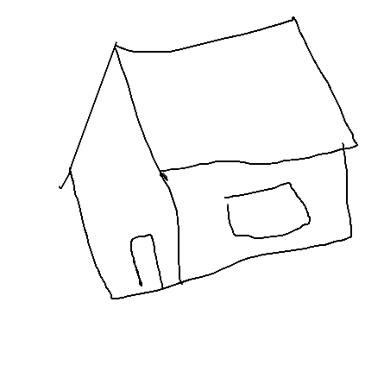

In [13]:
img

In [13]:
# from PIL import Image

# # Open the image file
# image = Image.open("C:/Users/KP/Downloads/sketchify/sketchify/images/drawing.png")
# image
# # Convert the image to RGB mode
# image = image.convert("RGB")

# # Calculate the aspect ratio
# width, height = image.size
# aspect_ratio = width / height

# # Determine the new dimensions while maintaining the aspect ratio
# new_width = 500
# new_height = int(new_width / aspect_ratio)

# # Resize the image
# resized_image = image.resize((new_width, new_height))

# # Save the resized image as JPEG
# resized_image.save("output_image.jpg")


In [14]:
# Set up our initial generation parameters.
answers2 = stability_api.generate(
    prompt="I need a tree in the background",
    init_image=img, # Assign our previously generated img as our Initial Image for transformation.
    start_schedule=0.6, # Set the strength of our prompt in relation to our initial image.
    seed=123467458, # If attempting to transform an image that was previously generated with our API,
                    # initial images benefit from having their own distinct seed rather than using the seed of the original image generation.
    steps=30, # Amount of inference steps performed on image generation. Defaults to 30.
    cfg_scale=8.0, # Influences how strongly your generation is guided to match your prompt.
                   # Setting this value higher increases the strength in which it tries to match your prompt.
                   # Defaults to 7.0 if not specified.
    width=512, # Generation width, defaults to 512 if not included.
    height=512, # Generation height, defaults to 512 if not included.
    sampler=generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
                                                 # Defaults to k_dpmpp_2m if not specified. Clip Guidance only supports ancestral samplers.
                                                 # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m, k_dpmpp_sde)
)

# Set up our warning to print to the console if the adult content classifier is tripped.
# If adult content classifier is not tripped, save generated image.
for resp in answers2:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            global img2
            img2 = Image.open(io.BytesIO(artifact.binary))
            img2.save(str(artifact.seed)+ "-img2img.png") # Save our generated image with its seed number as the filename and the img2img suffix so that we know this is our transformed image.

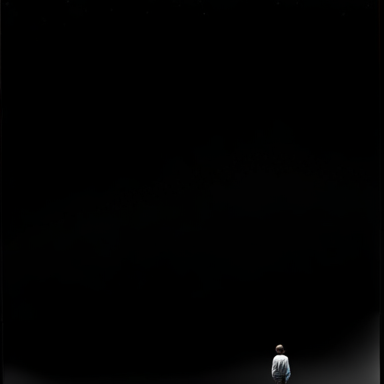

In [15]:
img2